# Directory, data and libraries

In [2]:
# Libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm


In [3]:
# Load data
df = pd.read_csv("Wine-quality-challenge.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution 


<AxesSubplot:ylabel='Density'>

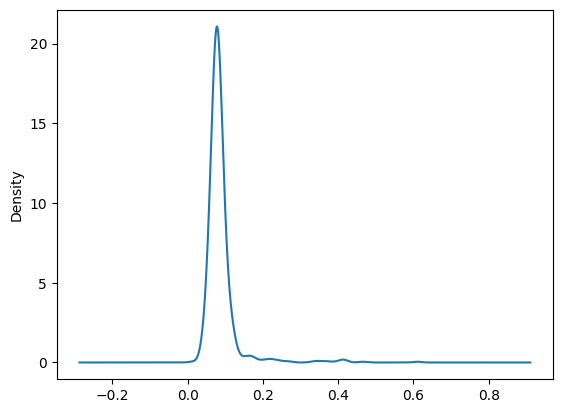

In [4]:
# Density plot of Chlorides
df.chlorides.plot.density()

In [8]:
# Check the number of observations within X standard deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 1 * df.chlorides.std()) &
       ( df.chlorides >= df.chlorides.mean() - 1 * df.chlorides.std())].chlorides.count() / df.chlorides.count()

0.9480925578486554

In [9]:
# Check the number of observations within X standard deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 2 * df.chlorides.std()) &
       ( df.chlorides >= df.chlorides.mean() - 2 * df.chlorides.std())].chlorides.count() / df.chlorides.count()

0.9718574108818011

In [10]:
# Check the number of observations within X standard deviations
df.loc[(df.chlorides <= df.chlorides.mean() + 3 * df.chlorides.std()) &
       ( df.chlorides >= df.chlorides.mean() - 3 * df.chlorides.std())].chlorides.count() / df.chlorides.count()

0.9806128830519074

We can conclude that since it does not follow 68, 95, 99. Then it is not a Normal Distribution

<AxesSubplot:ylabel='Density'>

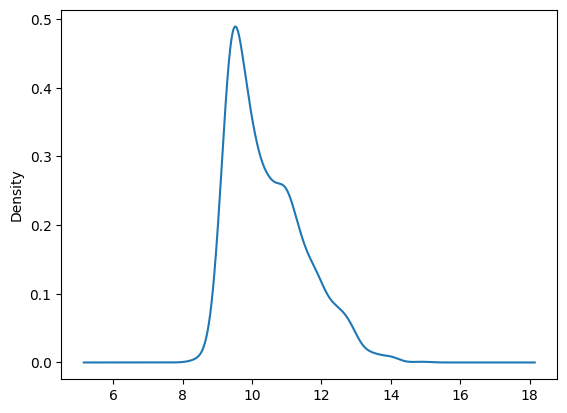

In [19]:
# Alchohol density plot
df.alcohol.plot.density()

In [16]:
# Find share of observations within 1,2,3 standard deviations within alchohol
df.loc[(df.alcohol <= df.alcohol.mean() + 1 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 1 * df.alcohol.std())].alcohol.count()/ df.alcohol.count()

0.7035647279549718

In [17]:
# Find share of observations within 1,2,3 standard deviations within alchohol
df.loc[(df.alcohol <= df.alcohol.mean() + 2 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 2 * df.alcohol.std())].alcohol.count()/ df.alcohol.count()

0.9562226391494684

In [18]:
# Find share of observations within 1,2,3 standard deviations within alchohol
df.loc[(df.alcohol <= df.alcohol.mean() + 3 * df.alcohol.std()) &
       (df.alcohol >= df.alcohol.mean() - 3 * df.alcohol.std())].alcohol.count()/ df.alcohol.count()

0.9949968730456535

The alchohol population adheres more to the 68, 95, 99 rule. So it has a similar resemblance to a normal distribution, but it is still not one.

# Shapiro-Wilks Test
A method to determine whether a distribution is Normal/Gaussian

In [28]:
def shapiro_test(l):
    """A simple method that determines if a distribution is Normal or not using Shapiro-Wilkes test"""
    stat, p = st.shapiro(l)
    if p > 0.05:
        print("Sample looks Gaussian/Normal (Fail to reject H0)")
        return p
    else:
        print("Sample does not look Gaussian/Normal (reject H0)")
        return p

In [29]:
# Shapiro-Wilks test for normality

shapiro_test(df.chlorides)



Sample does not look Gaussian/Normal (reject H0)


0.0

In [30]:
# Determine if Sulphates is a normal distribution
shapiro_test(df.sulphates)

Sample does not look Gaussian/Normal (reject H0)


5.821617678881608e-38

# Standard Error
Showcasing the estimate of how far a sample mean can be from the population mean

In [32]:
#Using a function
st.sem(df.alcohol)

0.026650018979018173

In [33]:
# Us making the computation: Standard Deviation / the square root of observations
df.alcohol.std() / m.sqrt(df.alcohol.count())

0.026650018979018173

In [34]:
# Standard Error of pH
st.sem(df.pH)

0.0038608683325203784

In [35]:
df.pH.std() / m.sqrt(df.pH.count())

0.0038608683325203784

# Confidence Interval

In [39]:
# Confidence interval of the mean of citric acid
print(df[['citric acid']].mean())
st.norm.interval(confidence = 0.95, loc = df[['citric acid']].mean(), scale = st.sem(df[['citric acid']]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

<AxesSubplot:>

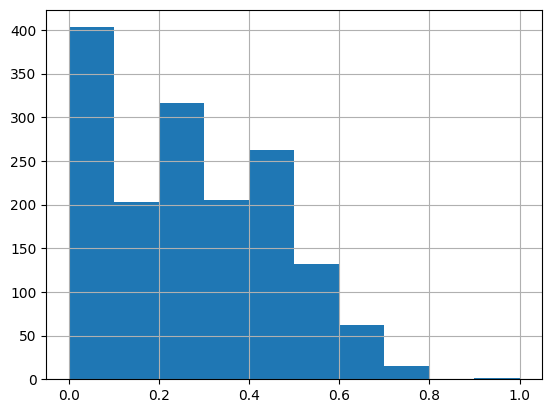

In [40]:
# Histogram
df['citric acid'].hist()

In [41]:
#CI of density mean
st.norm.interval(confidence=.95, loc = df.density.mean(), scale = st.sem(df.density))

(0.9966541725972521, 0.9968391857517162)

<AxesSubplot:>

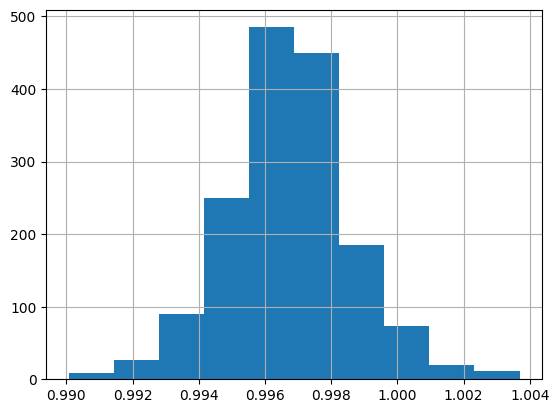

In [44]:
# histogram of density
df.density.hist()

# T-test

In [46]:
#load data
data = pd.read_csv("stackoverflow.csv")
data.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
# Subset the data
salary_uk = data.loc[data.Country == "United Kingdom"].Salary
salary_de = data.loc[data.Country == "Germany"].Salary
salary_uk, salary_de

(0       100000.0
 11       32500.0
 12       30000.0
 17       32500.0
 18       43750.0
           ...   
 5575     53750.0
 5577     45000.0
 5580     43750.0
 5589     88750.0
 5592     33750.0
 Name: Salary, Length: 1023, dtype: float64,
 3       64516.129030
 7       53763.440860
 9       83870.967740
 25      10752.688170
 43      59139.784950
             ...     
 5570    60215.053760
 5571    48387.096770
 5574    69892.473120
 5578     8602.150538
 5579    41935.483870
 Name: Salary, Length: 757, dtype: float64)

In [53]:
# T-test for 2 Independant samples
stat, p = st.ttest_ind(salary_uk, salary_de)
if p > .05:
    print("Both countries have similar salaries (failed to reject).")
else:
    print("There is a difference (Reject null hypothesis)")
p

There is a difference (Reject null hypothesis)


0.026389999555203502

<AxesSubplot:>

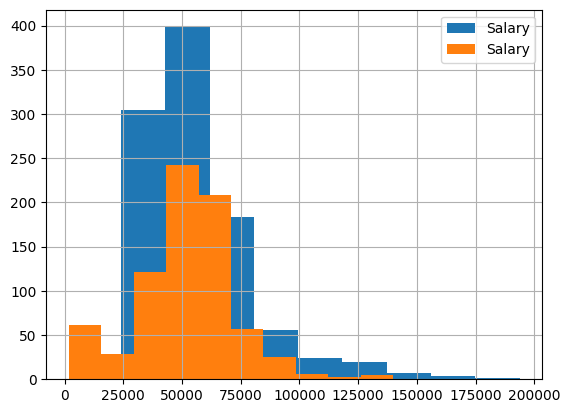

In [59]:
# Histograms
salary_uk.hist(legend=True)
salary_de.hist(legend=True)

In [54]:
# T-test between India and the US.
experience_us = data.loc[data.Country == "United States"].YearsCodedJob
experience_ind = data.loc[data.Country == "India"].YearsCodedJob

experience_ind, experience_us

(4       1
 24      1
 60      2
 64      2
 78      5
        ..
 5569    5
 5573    2
 5588    5
 5590    2
 5591    2
 Name: YearsCodedJob, Length: 538, dtype: int64,
 1       20
 2       16
 5        1
 6       13
 8        7
         ..
 5584     1
 5585     1
 5586     4
 5587    10
 5593     3
 Name: YearsCodedJob, Length: 2791, dtype: int64)

In [56]:
# T-test for 2 Independant samples
stat, p = st.ttest_ind(experience_us, experience_ind)
if p > .05:
    print("Both countries have similar experience (failed to reject).")
else:
    print("There is a difference in experience (Reject null hypothesis)")
p

There is a difference in experience (Reject null hypothesis)


5.225676347614714e-58

<AxesSubplot:>

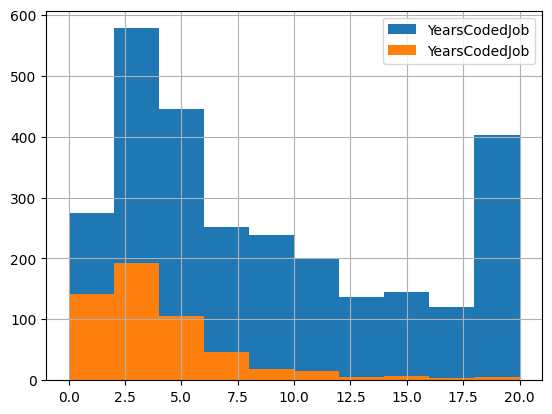

In [58]:
# Histograms
experience_us.hist(legend=True)
experience_ind.hist(legend=True)


# Chi-squared test
Works similar to the ttest but with different results. Uses only categorical values and tests the frequency between two categorical options. 

In [60]:
# cross tabulation
tab = pd.crosstab(index = data.Country, columns=data.Remote)
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [62]:
# Chi_squared test
chi2, p, dof, exp = st.chi2_contingency(tab)
if p > .05:
    print("There is no relationship (failed to reject null hypothesis).")
else:
    print("There is a strong relationship (Reject null hypothesis)")
p

There is a strong relationship (Reject null hypothesis)


3.3211208773012153e-16

In [72]:
# Chi-squared test between company size and hobbies
size = data.CompanySizeNumber
hobbies = data.Hobby
tab2 = pd.crosstab(hobbies, size)
tab2

CompanySizeNumber,1,10,20,100,500,1000,5000,10000
Hobby,,,,,,,,
0,101,123,293,245,91,180,60,243
1,311,400,961,918,309,436,192,731


In [73]:
# Chi-squared test
chi2, p, dof, exp = st.chi2_contingency(tab2)
if p > .05:
    print("There is no relationship (failed to reject null hypothesis).")
else:
    print("There is a strong relationship (Reject null hypothesis)")
p

There is a strong relationship (Reject null hypothesis)


0.025708455559671006